In [4]:
import cv2
import numpy as np

In [5]:
src=cv2.imread("lena.bmp",cv2.IMREAD_GRAYSCALE)

In [6]:
src.dtype

dtype('uint8')

## (a)threshold at 128

In [7]:
rows,cols=src.shape
thresHoldImg=np.zeros(shape=src.shape,dtype=src.dtype)
for i in range (rows):
    for j in range(cols):
        if src[i,j]>128:
            thresHoldImg[i,j]=255
        else:
            thresHoldImg[i,j]=0
cv2.imwrite("thresHoldImg.png",thresHoldImg)

True

## (b)histogram

In [9]:
hist.size

256

In [10]:
histH=[0]*256
for i in range(rows):
    for j in range(cols):
        histH[(src[i,j])]+=1

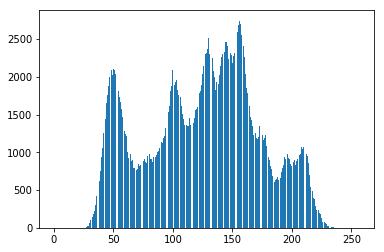

In [47]:
import matplotlib.pyplot as plt
plt.bar(range(1,257),histH)
plt.show()

## (c)connected component

In [33]:
class Stack:
    "A container with a last-in-first-out (LIFO) queuing policy."
    def __init__(self):
        self.list = []

    def push(self,item):
        "Push 'item' onto the stack"
        self.list.append(item)

    def pop(self):
        "Pop the most recently pushed item from the stack"
        return self.list.pop()

    def isEmpty(self):
        "Returns true if the stack is empty"
        return len(self.list) == 0

In [34]:
thresholdRegionPixels = 500
binary=cv2.imread("thresHoldImg.png",cv2.IMREAD_GRAYSCALE)
width,height=src.shape

In [35]:
binary

array([[255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [36]:
visited = np.zeros((width, height))
labeledImageArray = np.zeros((width, height))
idCount = 1
numberLabel = np.zeros(width * height)

In [37]:
for i in range(width):
    for j in range(height):
        if binary[i, j] == 0:
            visited[i, j] = 1
        elif visited[i, j] == 0:
            stack = Stack()
            stack.push((i, j))
            while not stack.isEmpty():
                col, row = stack.pop()

                if visited[col, row] == 1:
                    continue
                visited[col, row] = 1

                numberLabel[idCount] = numberLabel[idCount] + 1

                #find 4-connected component
                for x in [col - 1, col, col + 1]:
                    for y in [row - 1, row, row + 1]:
                        if (0 <= x < width) and (0 <= y < height):
                            if (binary[x, y] != 0) and (visited[x, y] == 0):
                                stack.push((x, y))
            idCount += 1


In [38]:
numberLabel.shape

(262144,)

In [43]:
rectangles = Stack()

for index, n in enumerate(numberLabel):
    if (n >= thresholdRegionPixels):
        rectLeft = width
        rectRight = 0
        rectTop = height
        rectBottom = 0
        for x in range(width):
            for y in range(height):
                if (labeledImageArray[x, y] == index):
                    if (x < rectLeft):
                        rectLeft = x
                    if (x > rectRight):
                        rectRight = x
                    if (y < rectTop):
                        rectTop = y
                    if (y > rectBottom):
                        rectBottom = y
        rectangles.push((rectLeft, rectRight, rectTop, rectBottom))


In [44]:
connectedImage = np.zeros(shape=src.shape,dtype=src.dtype)
connectedImage=cv2.cvtColor(connectedImage,cv2.COLOR_GRAY2BGR)
connectedImageArray = connectedImage

for i in range(width):
    for j in range(height):
        if (binary[i, j] == 0):
            connectedImageArray[i, j] = (0, 0, 0)
        else:
            connectedImageArray[i, j] = (255, 255, 255)

while not rectangles.isEmpty():
    rectLeft, rectRight, rectTop, rectBottom = rectangles.pop()
    cv2.rectangle(connectedImage,(rectLeft, rectTop),(rectRight, rectBottom),(0,0,255),2)
    CentroidX = int((rectLeft + rectRight) / 2)
    CentroidY = int((rectTop + rectBottom) / 2)
    cv2.line(connectedImage,(CentroidX-10, CentroidY),(CentroidX+10, CentroidY),(0,0,255),5)
    cv2.line(connectedImage,(CentroidX, CentroidY-10),(CentroidX, CentroidY+10),(0,0,255),5)
cv2.imwrite("connectedComponent.bmp",connectedImage)


-1